In [148]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [149]:
#Read Files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [150]:
#Metrics
def L1(I1,I2):
    sum=0
    for i in range(len(I1)):
        sum+=abs(int(I1[i])-int(I2[i]))
    return sum
def L2(I1,I2):
    sum=0
    for i in range(len(I1)):
        sum+=(int(I1[i]) - int(I2[i])) ** 2
    sum=math.sqrt(sum)
    return sum

def dist(I1,I2,metric):
    ans=metric(I1,I2)
    return ans

In [151]:
#KNN train, test and additional Bubble functions
def train(web,pic,label):
    web.append( (pic,label) )
    
def bubblePosition(arr,n,nw):
    for i in range(n):
        if nw < arr[i]:
            return i
    return n

def bubblePush(arr,n,pos,el):
    arr=np.insert(arr,pos,el)
    arr=arr[:-1]
    return arr

def test(web,pic,metr,k):
    near = np.ones(k)
    near*=99999999
    ans = np.ones(k)
    ans*=-1
    
    for el,label in web:
        r=dist(el,pic,metr)
        pos=bubblePosition(near,k,r)
        near=bubblePush(near,k,pos,r)
        ans=bubblePush(ans,k,pos,label)    
    
    category = np.zeros(10)
    for i in ans:
        category[int(i)]+=1
    maxAns=-1
    maximum=-1
    for i in range(10):
        if(category[i] > maximum):
            maximum=category[i]
            maxAns=i
    
    return maxAns

In [152]:
#Read Data From file
dataSet = unpickle("data_batch_1")
labels=dataSet[b'labels']
data=dataSet[b'data']
filenames=dataSet[b'filenames']
labels=labels[:100]
data=data[:100]
filenames=filenames[:100]

In [153]:
#Split Data to train/test
X_all, X_test, y_all, y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [154]:
X_train, X_validate, y_train, y_validate = train_test_split(X_all,y_all,test_size=0.2,random_state=0)

In [155]:
web = []
for i in range(len(X_train)):
    train(web,X_train[i],y_train[i])

In [156]:
good=0
for k in range(2,7):
    for i in range(len(X_validate)):
        ans=test(web,X_validate[i],L1,k)
        if(ans == y_validate[i]):
            good+=1
    print("L1",k,good/len(X_validate))

L1 2 0.0625
L1 3 0.125
L1 4 0.1875
L1 5 0.25
L1 6 0.375


In [157]:
good=0
for k in range(2,7):
    for i in range(len(X_validate)):
        ans=test(web,X_validate[i],L2,k)
        if(ans == y_validate[i]):
            good+=1
    print("L2",k,good/len(X_validate))

L2 2 0.125
L2 3 0.1875
L2 4 0.25
L2 5 0.3125
L2 6 0.375


In [159]:
k=6
good=0
for i in range(len(X_test)):
    ans=test(web,X_test[i],L2,k)
    if(ans == y_test[i]):
        good+=1
print(good/len(X_test))

0.4


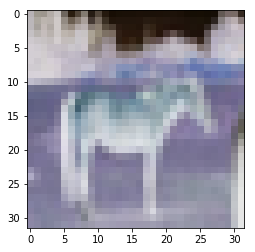

b'puppy_s_001691.png'
7


In [630]:
#Draw pictures from dataset
i=9999
#for name in filenames:
img=data[i].astype("float")
img=img.reshape(3,32,32).transpose(1,2,0)
plt.imshow(img)
plt.show()
print(name)
print(labels[i])
#    i=i+1 